In [1]:
import os
import re
import pandas as pd
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import logging
from tqdm import tqdm
import torch

c:\Users\durud\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = 'london'
review_df = pd.read_csv(f'csv/{dataset}_processed_reviews.csv')

roberta_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_pipeline = pipeline("sentiment-analysis", model=roberta_model, tokenizer=roberta_tokenizer)

aspects = ['cleanliness', 'room', 'service', 'location', 'value', 'safety', 'comfort', 'transportation', 'noise']
weights = {'LABEL_0': -1, 'LABEL_1': 0, 'LABEL_2': 1}
batch_size = 16

aspect_keywords = {
    'cleanliness': ['clean', 'dirty', 'smell', 'stink', 'stunk', 'filthy'],
    'room': ['room', 'bed', 'suite', 'large'],
    'service': ['service', 'staff', 'help', 'support'],
    'location': ['location', 'close', 'area', 'far'],
    'value': ['value', 'worth', 'price'],
    'safety': ['safe', 'safety', 'secure', 'danger', 'dangerous'],
    'comfort': ['comfort', 'comfortable', 'uncomfortable'],
    'transportation': ['bus', 'metro', 'station', 'close', 'walk'],
    'noise': ['sound', 'volume', 'noisy', 'noise']
}

def is_aspect_mentioned(review, aspect):
    keywords = aspect_keywords[aspect]
    return any(keyword in review for keyword in keywords)

for aspect in aspects:
    review_df[f'{aspect}_score'] = 0

def process_reviews(pipeline, weights):
    for aspect in aspects:
        review_df[f'{aspect}_score'] = 0

    for aspect in aspects:
        print(f"Starting processing for aspect: {aspect}")
        for i in tqdm(range(0, len(review_df), batch_size), desc=f"Batches for {aspect}"):
            batch_reviews = review_df['processed_review'][i:i + batch_size]
            batch_index = batch_reviews.index
            aspect_mentioned = [is_aspect_mentioned(review, aspect) for review in batch_reviews]
            if any(aspect_mentioned):
                filtered_reviews = [review for review, mentioned in zip(batch_reviews, aspect_mentioned) if mentioned]
                aspect_reviews = [f"{aspect}: {review[:512 - len(aspect) - 2]}" for review in filtered_reviews]
                results = pipeline(aspect_reviews)
                scores = [weights[result['label']] * result['score'] for result in results]
                score_index = [index for index, mentioned in zip(batch_index, aspect_mentioned) if mentioned]
                review_df.loc[score_index, f'{aspect}_score'] = scores
            else:
                review_df.loc[batch_index, f'{aspect}_score'] = 0
    for aspect in aspects:
        review_df[f'{aspect}_score'] = pd.to_numeric(review_df[f'{aspect}_score'], errors='coerce')

    return review_df

FileNotFoundError: [Errno 2] No such file or directory: 'csv/london_processed_reviews.csv'

In [ ]:
review_df = process_reviews(roberta_pipeline, weights)

Starting processing for aspect: cleanliness


Batches for cleanliness:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.8203112483024597, 0.9685758948326111, -0.692474365234375, -0.9252609014511108, -0.5188814401626587, 0.0, 0.7160266041755676, -0.6835156679153442, 0.0, 0.0, 0.9780176281929016, -0.565558910369873, 0.8789529204368591]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for cleanliness: 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]


Starting processing for aspect: room


Batches for room:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7922543883323669, 0.9732838273048401, -0.834597647190094, -0.8864601850509644, -0.5774040222167969, 0.0, 0.6967795491218567, -0.6936190724372864, -0.6671088337898254, 0.0, -0.3755585253238678, -0.8560276627540588, 0.9786084294319153, -0.5444733500480652, -0.5990186929702759, 0.852684497833252]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for room: 100%|██████████| 4/4 [00:10<00:00,  2.59s/it]


Starting processing for aspect: service


Batches for service:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.9730436205863953, -0.7927008271217346, -0.5697402954101562, 0.0, 0.7215278744697571, -0.6808756589889526, 0.0, 0.9792348146438599, -0.5311620235443115]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for service: 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]


Starting processing for aspect: location


Batches for location:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.8255940675735474, 0.9705244898796082, -0.7860846519470215, -0.5838285684585571, 0.0, 0.7534772157669067, -0.6859822273254395, -0.6587303876876831, 0.0, 0.0, 0.9790594577789307, -0.5540463328361511, 0.8489293456077576]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for location: 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]


Starting processing for aspect: value


Batches for value:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6932583451271057, -0.6777087450027466, 0.0, 0.9797987937927246, 0.850718080997467]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for value: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Starting processing for aspect: safety


Batches for safety:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.8147538900375366, -0.841133713722229, -0.5531483888626099, 0.0]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for safety: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


Starting processing for aspect: comfort


Batches for comfort:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6521350145339966, -0.604325532913208, 0.9756522178649902]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for comfort: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


Starting processing for aspect: transportation


Batches for transportation:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.8224063515663147, 0.9709758758544922, -0.5672696828842163, 0.0, 0.7302924394607544, -0.6763343811035156, -0.67026287317276, 0.0, 0.0, -0.4793994426727295, 0.8602226972579956]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for transportation: 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]


Starting processing for aspect: noise


Batches for noise:   0%|          | 0/4 [00:00<?, ?it/s]C:\Users\durud\AppData\Local\Temp\ipykernel_460\1171202871.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.8101730346679688, 0.837806224822998]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  review_df.loc[score_index, f'{aspect}_score'] = scores
Batches for noise: 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


In [ ]:
def map_score_to_label(score, negative_threshold=-0.2, positive_threshold=0.2):
    if score < negative_threshold:
        return -1
    elif score > positive_threshold:
        return 1
    else:
        return 0

In [ ]:
import pandas as pd
annotated_df = pd.read_excel('xlsx/london_derlenmis_reviews.xlsx')
annotated_df = annotated_df.drop('hotel_review', axis=1)

reviewdf = review_df
reviewdf = reviewdf.drop('processed_review', axis=1)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure both DataFrames are sorted similarly
reviewdf = reviewdf.sort_values(by=['hotel_name', 'hotel_city']).reset_index(drop=True)
annotated_df = annotated_df.sort_values(by=['hotel_name', 'hotel_city']).reset_index(drop=True)

# Map DeBERTa scores to labels
for aspect in ['cleanliness', 'room', 'service', 'location', 'value', 'safety', 'comfort', 'transportation', 'noise']:
    reviewdf[f'{aspect}_label'] = reviewdf[f'{aspect}_score'].apply(map_score_to_label)

accuracy_mean = 0
precision_mean = 0
recall_mean = 0
f1_mean = 0
inc = 0
# Compare predictions to ground truth
for aspect in ['cleanliness', 'room', 'service', 'location', 'value', 'safety', 'comfort', 'transportation', 'noise']:
    accuracy = accuracy_score(annotated_df[f'{aspect}_score'], reviewdf[f'{aspect}_label'])
    precision = precision_score(annotated_df[f'{aspect}_score'], reviewdf[f'{aspect}_label'], average='weighted')
    recall = recall_score(annotated_df[f'{aspect}_score'], reviewdf[f'{aspect}_label'], average='weighted')
    f1 = f1_score(annotated_df[f'{aspect}_score'], reviewdf[f'{aspect}_label'], average='weighted')
    '''
    print(f'Aspect: {aspect}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}\n')
    '''
    accuracy_mean += accuracy
    precision_mean += precision
    recall_mean += recall
    f1_mean += f1
print(f'accuracy_mean: {accuracy_mean/9}')
print(f'precision_mean: {precision_mean/9}')
print(f'recall_mean: {recall_mean/9}')
print(f'f1_mean: {f1_mean/9}')

accuracy_mean: 0.5860215053763441
precision_mean: 0.644651767826767
recall_mean: 0.5860215053763441
f1_mean: 0.5842726652170586


c:\Users\durud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


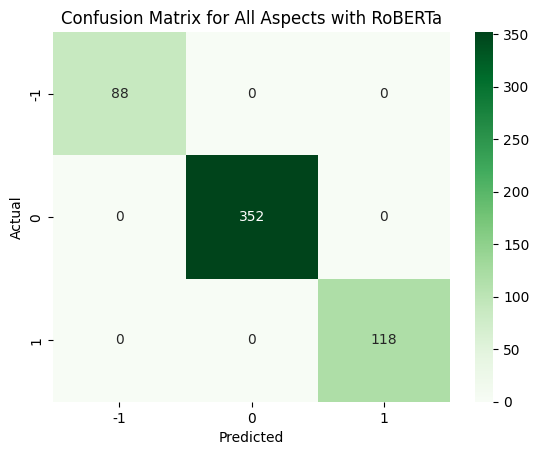

In [ ]:
import numpy as np
true_labels = np.concatenate([reviewdf[f'{aspect}_label'].values for aspect in ['cleanliness', 'room', 'service', 'location', 'value', 'safety', 'comfort', 'transportation', 'noise']])
predicted_labels = np.concatenate([reviewdf[f'{aspect}_score'].apply(map_score_to_label).values for aspect in ['cleanliness', 'room', 'service', 'location', 'value', 'safety', 'comfort', 'transportation', 'noise']])

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for All Aspects with RoBERTa')
plt.show()

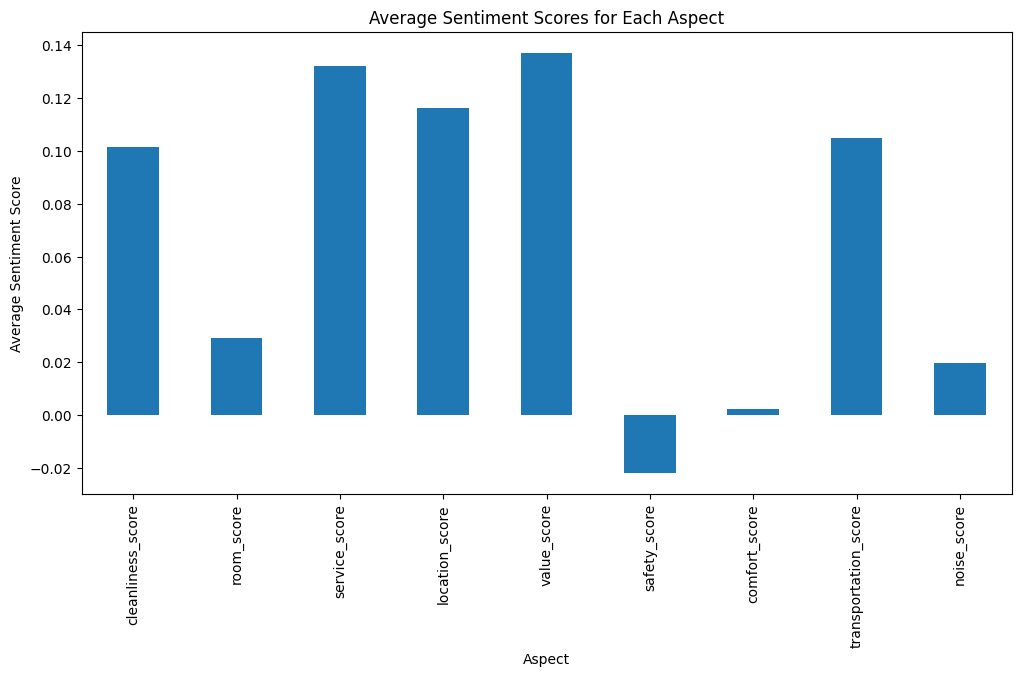

In [ ]:
avg_scores = reviewdf[[f'{aspect}_score' for aspect in aspects]].mean()
avg_scores.plot(kind='bar', figsize=(12, 6), title='Average Sentiment Scores for Each Aspect')
plt.xlabel('Aspect')
plt.ylabel('Average Sentiment Score')
plt.show()


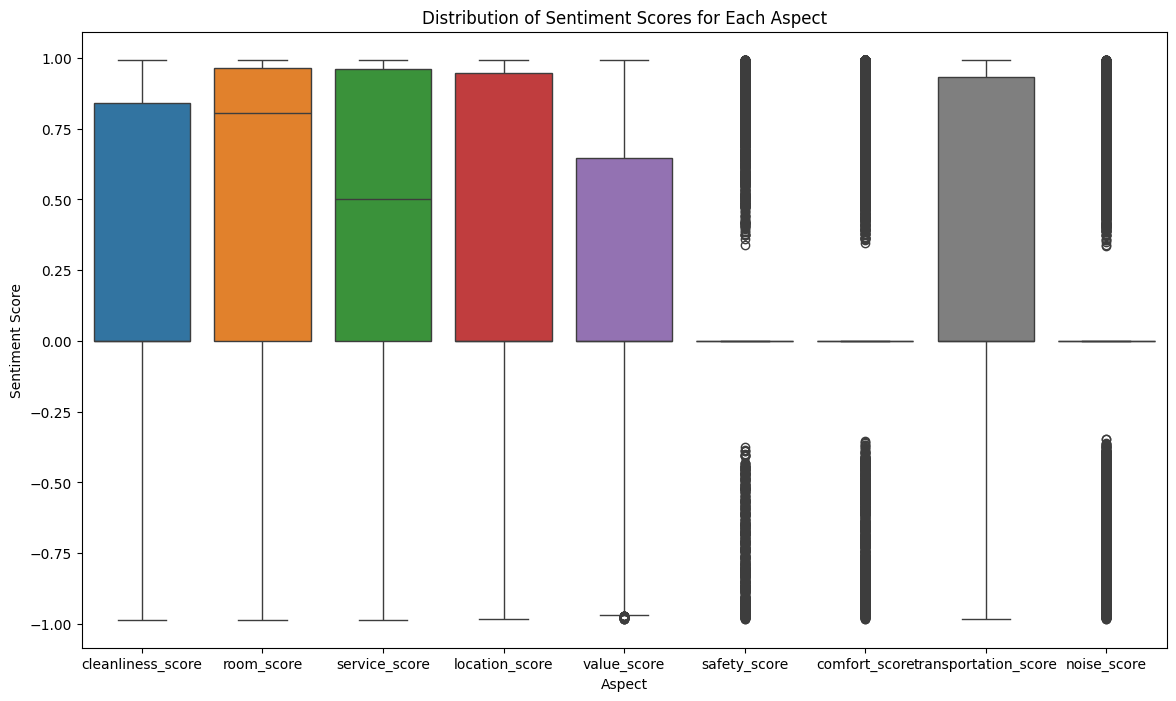

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=review_df[[f'{aspect}_score' for aspect in aspects]])
plt.title('Distribution of Sentiment Scores for Each Aspect')
plt.xlabel('Aspect')
plt.ylabel('Sentiment Score')
plt.show()
